In [2]:
import os
import sys
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import time
import calendar
from datetime import datetime, date, timedelta
import pickle


In [154]:
initial_date = "2013-03-31"
final_date = "2023-07-15"

In [152]:
#open the df_bitfinex_volume.csv file
df_bitfinex_volume = pd.read_csv("df_bitfinex_volume.csv")
df_bitfinex_volume.index =df_bitfinex_volume['Date']
df_bitfinex_volume = df_bitfinex_volume.drop(['Date'], axis=1)
df_bitfinex_volume

,Daily Volume
Date,
2013-03-31,5224.401313
2013-04-01,8376.527478
2013-04-02,12996.245072
2013-04-03,6981.668305
2013-04-04,5234.882203
...,...
2023-07-11,1636.401373
2023-07-12,3763.115501
2023-07-13,2982.608992


In [155]:
# open the df_price_btc_usd_agregate file
df_price_btc_usd_agregate = pd.read_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_agregate.csv")
df_price_btc_usd_agregate_svar = df_price_btc_usd_agregate[df_price_btc_usd_agregate["Date"]>=initial_date]
df_price_btc_usd_agregate_svar = df_price_btc_usd_agregate_svar[df_price_btc_usd_agregate_svar["Date"]<=final_date] 
df_price_btc_usd_agregate_svar.index = df_price_btc_usd_agregate_svar['Date']
del df_price_btc_usd_agregate_svar['Date']
df_price_btc_usd_agregate_svar


,Close
Date,
2013-03-31,92.743611
2013-04-01,100.409370
2013-04-02,108.063618
2013-04-03,128.261101
2013-04-04,132.155428
...,...
2023-07-11,30371.646832
2023-07-12,31451.123508
2023-07-13,30309.254446


In [167]:
#get df_blockstats_daily_mean.csv
df_blockstats_daily_mean = pd.read_csv("/home/moises/Data_BTC_thesis/df_blockstats_daily_mean.csv")
df_blockstats_daily_mean = df_blockstats_daily_mean[(df_blockstats_daily_mean["Date"]>=initial_date) & (df_blockstats_daily_mean["Date"]<=final_date)]
df_blockstats_daily_mean

,GMT,index,avgfee,avgfeerate,avgtxsize,height,ins,maxfee,maxfeerate,maxtxsize,...,avgfee_btc,maxfee_btc,minfee_btc,subsidy_btc,blockhash_decimal,Close,Date,avgfee_USD,maxfee_USD,minfee_USD
1542,2013-03-31,879.875,97333.220238,163.267857,830.791667,228922.541667,707.571429,7.775612e+06,3338.738095,16464.940476,...,0.000973,0.077756,5.952381e-07,25.00,2.082020e+60,92.743611,2013-03-31,0.090270,7.211384,0.000055
1543,2013-04-01,105.500,80666.772727,158.116162,570.424242,229106.500000,650.797980,2.725213e+06,5080.934343,15467.085859,...,0.000807,0.027252,1.515152e-06,25.00,2.113253e+60,100.409370,2013-04-01,0.080997,2.736369,0.000152
1544,2013-04-02,295.000,81245.955801,161.950276,528.209945,229296.000000,811.618785,8.303811e+06,7573.016575,16302.441989,...,0.000812,0.083038,1.104972e-06,25.00,1.948098e+60,108.063618,2013-04-02,0.087797,8.973399,0.000119
1545,2013-04-03,473.000,95721.051429,194.994286,533.354286,229474.000000,849.680000,1.400018e+07,10347.594286,14619.680000,...,0.000957,0.140002,0.000000e+00,25.00,2.049811e+60,128.261101,2013-04-03,0.122773,17.956781,0.000000
1546,2013-04-04,637.500,98543.233766,192.428571,571.006494,229638.500000,1032.461039,1.963353e+07,6570.993506,18351.681818,...,0.000985,0.196335,3.896104e-06,25.00,2.109398e+60,132.155428,2013-04-04,0.130230,25.946782,0.000515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,2023-07-11,249.000,4667.859259,12.118519,639.244444,798250.000000,6807.355556,5.009927e+05,524.674074,81666.792593,...,0.000047,0.005010,4.747704e-06,6.25,2.490723e+53,30371.646832,2023-07-11,1.417706,152.159728,0.144196
5297,2023-07-12,388.500,4730.986111,12.944444,573.840278,798389.500000,6605.465278,5.442657e+05,618.784722,86429.326389,...,0.000047,0.005443,4.668889e-06,6.25,2.751876e+53,31451.123508,2023-07-12,1.487948,171.177689,0.146842
5298,2023-07-13,520.500,6221.858333,15.866667,712.700000,798521.500000,6779.566667,5.224473e+05,793.675000,72110.200000,...,0.000062,0.005224,4.922583e-06,6.25,2.613885e+53,30309.254446,2023-07-13,1.885799,158.349869,0.149200
5299,2023-07-14,649.500,6131.572464,15.963768,574.492754,798650.500000,7000.710145,5.951649e+05,711.695652,69613.471014,...,0.000061,0.005952,4.795290e-06,6.25,2.464456e+53,30290.682903,2023-07-14,1.857295,180.279525,0.145253


In [175]:
df_blockstats_daily_mean["total_out_BTC"] =(df_blockstats_daily_mean["total_out"] + df_blockstats_daily_mean["totalfee"] + df_blockstats_daily_mean["subsidy"])
total_out_BTC_USD= pd.DataFrame(df_blockstats_daily_mean["total_out_BTC"].values*df_price_btc_usd_agregate_svar["Close"].values, index=df_blockstats_daily_mean["Date"], columns=["total_out_BTC_usd"])
total_out_BTC_USD

,total_out_BTC_usd
Date,
2013-03-31,8.506092e+13
2013-04-01,7.348477e+13
2013-04-02,1.545441e+14
2013-04-03,1.737993e+14
2013-04-04,1.967458e+14
...,...
2023-07-11,1.835730e+16
2023-07-12,1.975522e+16
2023-07-13,2.349778e+16


In [164]:
#df_blockstats_daily_mean = df_blockstats_daily_mean[df_blockstats_daily_mean["Date"]>="2013-03-31"]
df_blockstats_daily_mean_copy = df_blockstats_daily_mean[(df_blockstats_daily_mean["Date"]>=initial_date) & (df_blockstats_daily_mean["Date"]<=final_date)]
df_blockstats_daily_mean_copy


,GMT,index,avgfee,avgfeerate,avgtxsize,height,ins,maxfee,maxfeerate,maxtxsize,...,minfee_btc,subsidy_btc,blockhash_decimal,Close,Date,avgfee_USD,maxfee_USD,minfee_USD,total_out_usd,total_out_usd_2
1542,2013-03-31,879.875,97333.220238,163.267857,830.791667,228922.541667,707.571429,7.775612e+06,3338.738095,16464.940476,...,5.952381e-07,25.00,2.082020e+60,92.743611,2013-03-31,0.090270,7.211384,0.000055,9.171621e+11,NaN
1543,2013-04-01,105.500,80666.772727,158.116162,570.424242,229106.500000,650.797980,2.725213e+06,5080.934343,15467.085859,...,1.515152e-06,25.00,2.113253e+60,100.409370,2013-04-01,0.080997,2.736369,0.000152,7.318517e+11,NaN
1544,2013-04-02,295.000,81245.955801,161.950276,528.209945,229296.000000,811.618785,8.303811e+06,7573.016575,16302.441989,...,1.104972e-06,25.00,1.948098e+60,108.063618,2013-04-02,0.087797,8.973399,0.000119,1.430121e+12,NaN
1545,2013-04-03,473.000,95721.051429,194.994286,533.354286,229474.000000,849.680000,1.400018e+07,10347.594286,14619.680000,...,0.000000e+00,25.00,2.049811e+60,128.261101,2013-04-03,0.122773,17.956781,0.000000,1.355043e+12,NaN
1546,2013-04-04,637.500,98543.233766,192.428571,571.006494,229638.500000,1032.461039,1.963353e+07,6570.993506,18351.681818,...,3.896104e-06,25.00,2.109398e+60,132.155428,2013-04-04,0.130230,25.946782,0.000515,1.488745e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,2023-07-11,249.000,4667.859259,12.118519,639.244444,798250.000000,6807.355556,5.009927e+05,524.674074,81666.792593,...,4.747704e-06,6.25,2.490723e+53,30371.646832,2023-07-11,1.417706,152.159728,0.144196,6.044224e+11,NaN
5297,2023-07-12,388.500,4730.986111,12.944444,573.840278,798389.500000,6605.465278,5.442657e+05,618.784722,86429.326389,...,4.668889e-06,6.25,2.751876e+53,31451.123508,2023-07-12,1.487948,171.177689,0.146842,6.281243e+11,NaN
5298,2023-07-13,520.500,6221.858333,15.866667,712.700000,798521.500000,6779.566667,5.224473e+05,793.675000,72110.200000,...,4.922583e-06,6.25,2.613885e+53,30309.254446,2023-07-13,1.885799,158.349869,0.149200,7.752676e+11,NaN
5299,2023-07-14,649.500,6131.572464,15.963768,574.492754,798650.500000,7000.710145,5.951649e+05,711.695652,69613.471014,...,4.795290e-06,6.25,2.464456e+53,30290.682903,2023-07-14,1.857295,180.279525,0.145253,6.857653e+11,NaN


In [25]:
#read the bitcoin_blockchain.db
import sqlite3
with sqlite3.connect("/home/moises/Data_BTC_thesis/bitcoin_blockchain.db") as conn:
    df_blockstats_daily = pd.read_sql_query("select * from blockchain", conn)

df_blockstats_daily["Date"] = pd.to_datetime(df_blockstats_daily["time"], unit='s')
df_blockstats_daily["Date"] = df_blockstats_daily["Date"].dt.date
df_blockstats_daily["Date"] = pd.to_datetime(df_blockstats_daily["Date"])
df_blockstats_daily

subsidy_daily_sum = df_blockstats_daily["subsidy"].groupby(df_blockstats_daily["Date"]).sum()
subsidy_daily_sum = pd.DataFrame(subsidy_daily_sum)
subsidy_daily_sum.columns = ["subsidy"]
subsidy_daily_sum

In [121]:
#get only the data from date greater than 2013-03-31 from subsidy_daily_sum_copy
#subsidy_daily_sum_copy = subsidy_daily_sum_copy[subsidy_daily_sum_copy["Date"]>="2013-03-31"]
subsidy_daily_sum_copy = (subsidy_daily_sum.cumsum()/100_000_000).copy()
subsidy_daily_sum_copy["Date"] = subsidy_daily_sum_copy.index.values
subsidy_daily_sum_copy = subsidy_daily_sum_copy[subsidy_daily_sum_copy["Date"]>="2013-03-31"]
subsidy_daily_sum_copy = subsidy_daily_sum_copy[subsidy_daily_sum_copy["Date"]<="2023-07-15"]
subsidy_daily_sum_copy["cumsum_subsidy"] = subsidy_daily_sum_copy["subsidy"]
#put values in USD
#subsidy_daily_sum_copy["subsidy"] = subsidy_daily_sum_copy["subsidy"]*df_price_btc_usd_agregate_svar["Close"]
subsidy_daily_sum_copy

,subsidy,Date,cumsum_subsidy
Date,,,
2013-03-31,10964200.00,2013-03-31,10964200.00
2013-04-01,10969150.00,2013-04-01,10969150.00
2013-04-02,10973675.00,2013-04-02,10973675.00
2013-04-03,10978050.00,2013-04-03,10978050.00
2013-04-04,10981900.00,2013-04-04,10981900.00
...,...,...,...
2023-07-11,19407556.25,2023-07-11,19407556.25
2023-07-12,19408456.25,2023-07-12,19408456.25
2023-07-13,19409206.25,2023-07-13,19409206.25


In [132]:
result = pd.DataFrame(df_price_btc_usd_agregate_svar["Close"].values*subsidy_daily_sum_copy["cumsum_subsidy"].values, index=df_price_btc_usd_agregate_svar.index.values, columns=["cumsum_supply_usd"])
df_cumsum_supply_BTC_usd = pd.DataFrame(result)
df_cumsum_supply_BTC_usd

,cumsum_supply_usd
2013-03-31,1.016860e+09
2013-04-01,1.101405e+09
2013-04-02,1.185855e+09
2013-04-03,1.408057e+09
2013-04-04,1.451318e+09
...,...
2023-07-11,5.894394e+11
2023-07-12,6.104178e+11
2023-07-13,5.882786e+11
2023-07-14,5.879442e+11


# Creation of the 2 series
volume_bitfinex/supply_btc(in USD) 

total_output(in USD)/supply_btc(in USD)

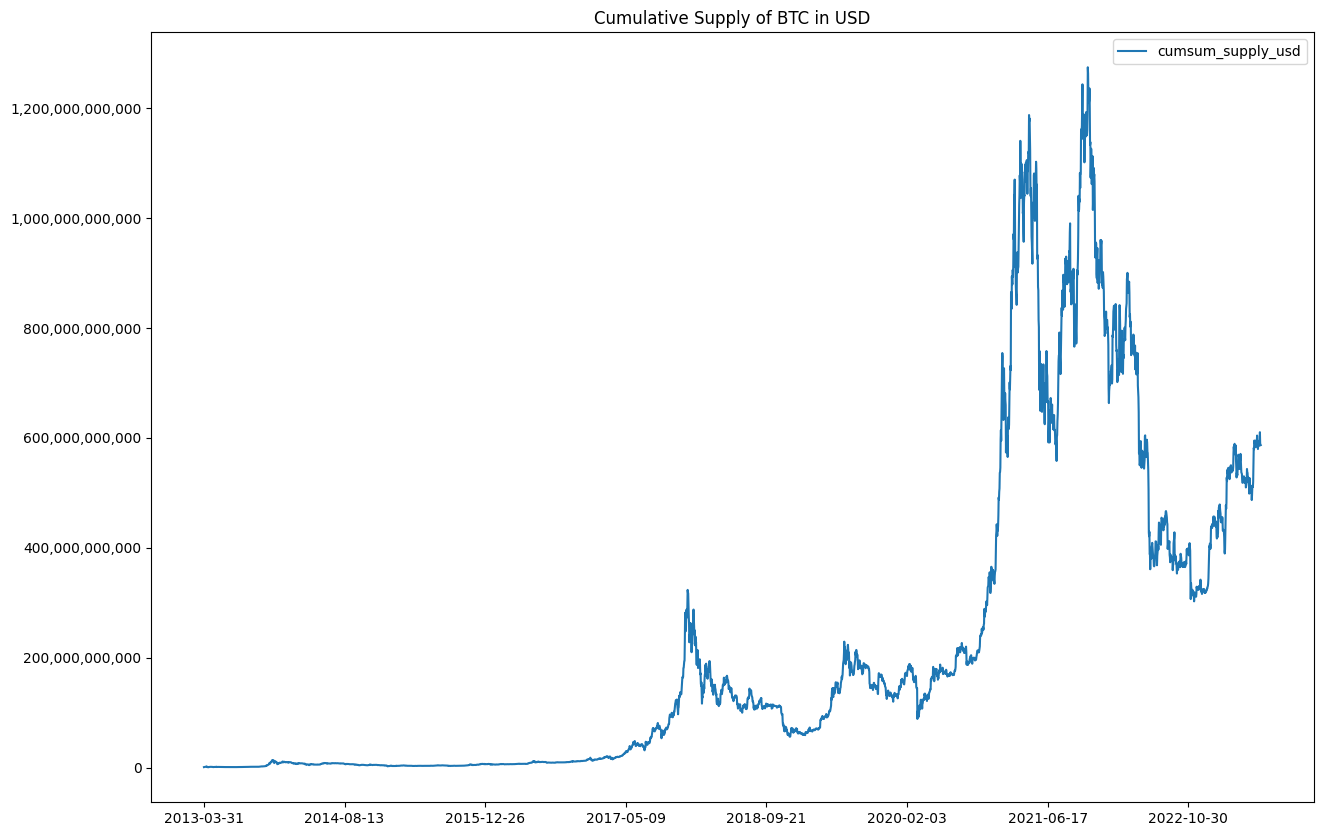

In [145]:
df_cumsum_supply_BTC_usd.plot(figsize=(15,10), title="Cumulative Supply of BTC in USD")
#set y axis as USD values with commas
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

<Axes: title={'center': 'vol_bitfinex_by_supply_btc'}>

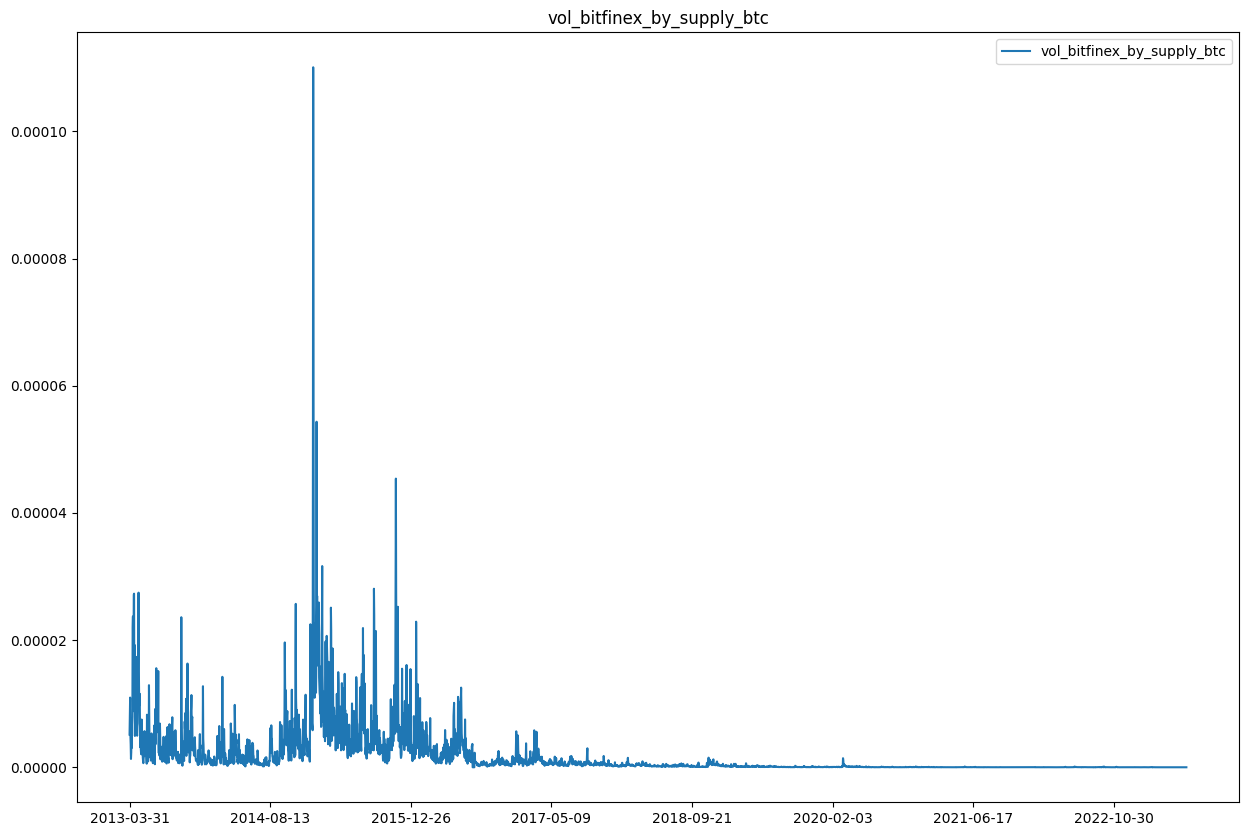

In [144]:
vol_bitfinex_by_supply_btc = pd.DataFrame(df_bitfinex_volume["Daily Volume"].values/df_cumsum_supply_BTC_usd["cumsum_supply_usd"].values, index=df_cumsum_supply_BTC_usd.index.values, columns=["vol_bitfinex_by_supply_btc"])
vol_bitfinex_by_supply_btc.plot(figsize=(15,10), title="vol_bitfinex_by_supply_btc")

In [165]:
df_total_out_usd = pd.DataFrame(df_blockstats_daily_mean["total_out_usd"].values/df_cumsum_supply_BTC_usd["cumsum_supply_usd"].values, index=df_cumsum_supply_BTC_usd.index.values, columns=["total_out_usd"])
df_total_out_usd

ValueError: operands could not be broadcast together with shapes (5317,) (3759,) 